### Student Information
Name: 洪偉豪

Student ID: 108062324

GitHub ID: MilkShakeBro

Kaggle name: milkshakebro

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2022-Lab2-master Repo](https://github.com/keziatamus/DM2022-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm2022-isa5810-lab2-homework) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/2b0d14a829f340bc88d2660dc602d4bd. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Nov. 22th 11:59 pm, Tuesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 25th 11:59 pm, Friday)__. 

# Part 1

## Exercise 1

In [2]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

# Answer here
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

count_vect = CountVectorizer()
train_counts_train = count_vect.fit_transform(train_df.text)
train_counts_test = count_vect.fit_transform(test_df.text)

# term_frequencies
term_frequencies_train = []
for j in range(0,train_counts_train.shape[1]):
    term_frequencies_train.append(sum(train_counts_train[:,j].toarray()))
term_frequencies_train = np.asarray(train_counts_train.sum(axis=0))[0]

term_frequencies_test = []
for j in range(0,train_counts_test.shape[1]):
    term_frequencies_test.append(sum(train_counts_test[:,j].toarray()))
term_frequencies_test = np.asarray(train_counts_test.sum(axis=0))[0]

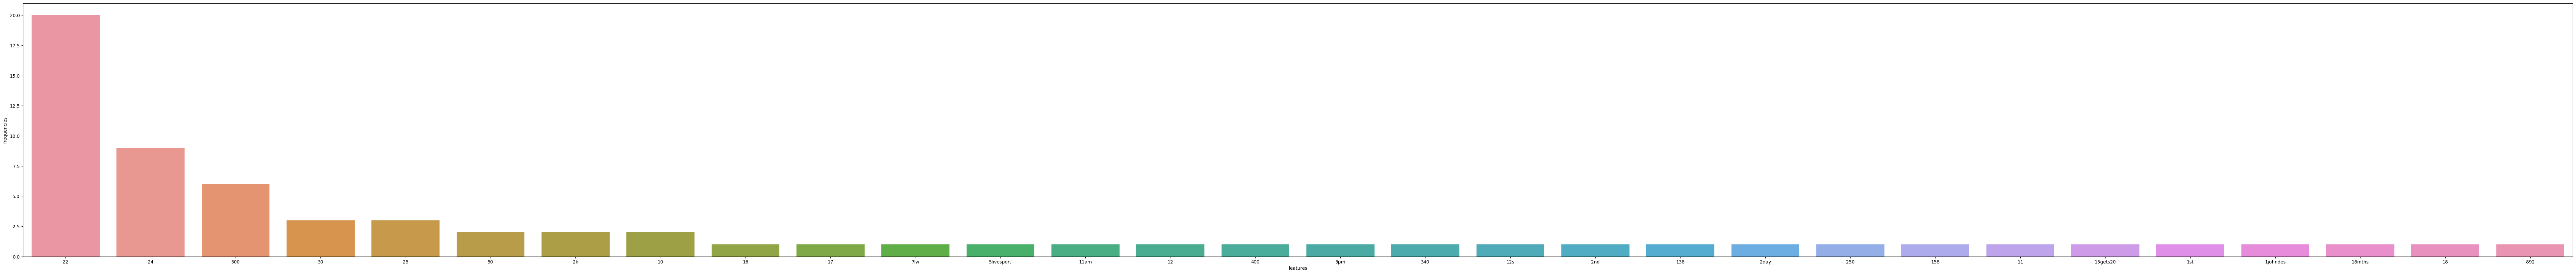

In [3]:
# Plot for training data
df = pd.DataFrame({"features": count_vect.get_feature_names_out()[:30], "frequencies": term_frequencies_train[:30]})
plt.subplots(figsize=(100, 10))
g = sns.barplot(x="features", y="frequencies", data=df, order=df.sort_values("frequencies", ascending = False).features)
plt.show()

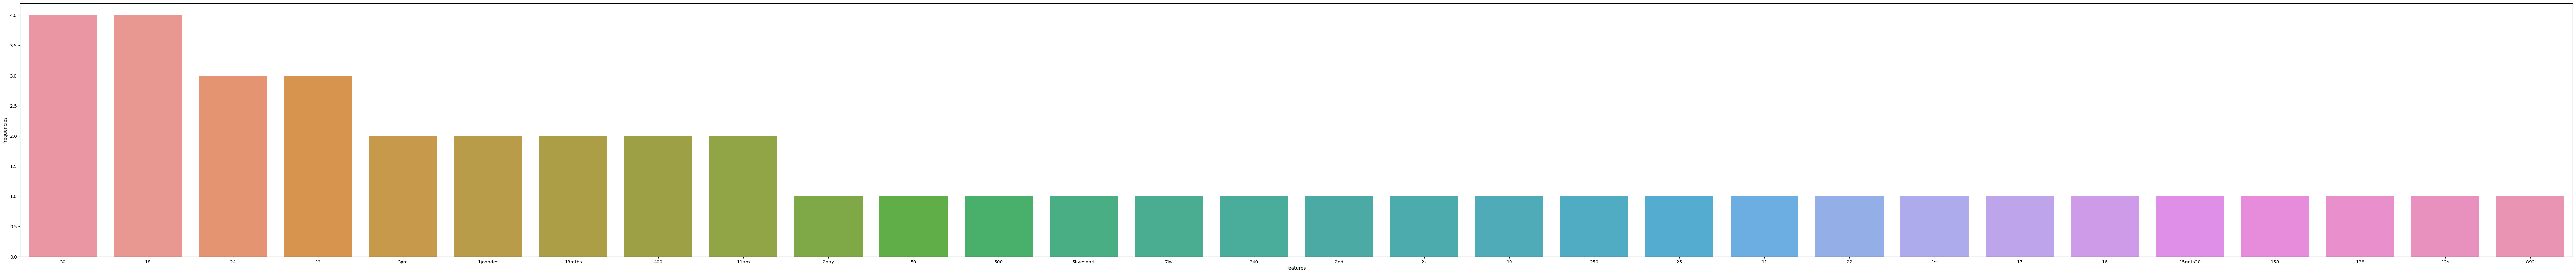

In [4]:
# Plot for testing data
df = pd.DataFrame({"features": count_vect.get_feature_names_out()[:30], "frequencies": term_frequencies_test[:30]})
plt.subplots(figsize=(100, 10))
g = sns.barplot(x="features", y="frequencies", data=df, order=df.sort_values("frequencies", ascending = False).features)
plt.show()

## Exercise 2

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

tfidf_count_vect = TfidfVectorizer()
tfidf_counts = tfidf_count_vect.fit_transform(train_df.text)

tfidf_feature_names = tfidf_count_vect.get_feature_names_out()
# tfidf_feature_names.shape
tfidf_feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

## Exercise 3

In [6]:
# Function for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

/Users/milkshakebro/Desktop/四上/資料探勘/venv/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


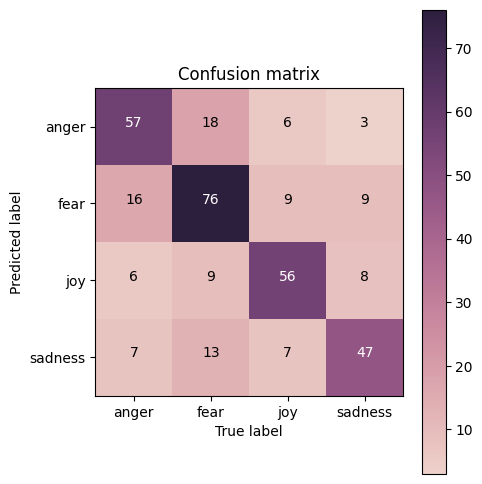

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 

# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')


### Explanation of the confusion matrix: 
True label means that the labels come from real data, while predicted label means that the labels come from predicted data. This confusion matrix uses the darkness of the color to differetiate the degree of the matching number. The left-up-right-down diagonal represents the true positive results, while the upper and lower triangle represent the false prediction result. By this colorful confusion matrix, we can clearly see the accurarcy of the prediction result.

## Exercise 4

Decision Tree
              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347

Naive Bayes
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



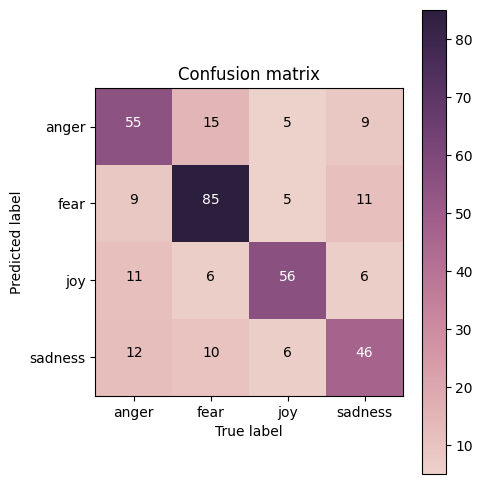

In [8]:
# Answer here
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train, y_train)
mnb.score(X_test, y_test)
y_test_pred_naive = mnb.predict(X_test)

print("Decision Tree")
print(classification_report(y_true=y_test, y_pred=y_test_pred))
print("Naive Bayes")
print(classification_report(y_true=y_test, y_pred=y_test_pred_naive))

cm_naive = confusion_matrix(y_true=y_test, y_pred=y_test_pred_naive) 

plot_confusion_matrix(cm_naive, classes=my_tags, title='Confusion matrix')

## Exercise 5

### Explanation of the results of Naive Bayes Classifier and Decision Tree Classifier:
By the perspective of the f1-score, Naive Bayes Classifier outperforms Decision Tree classifier. The reason may be the training data is too small for the decision tree to do the accurate precision or the feature selection for decision tree needs to be fine-tuned (change the feature amount or change the feature selection algorithm). Another reason may be that the degree of independence of the training data is high. Since the high degree of independence, the performance of the Naive Bayes classifier is better than Decision Tree Classifier.

## Exercise 6

In [9]:
import keras
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")

2022-11-14 22:21:10.511414: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


input_shape:  500
output_shape:  4
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)        

2022-11-14 22:21:24.604743: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/25


/Users/milkshakebro/Desktop/四上/資料探勘/venv/lib/python3.9/site-packages/tensorflow/python/framework/indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


113/113 [==============================] - 2s 5ms/step - loss: 1.3200 - accuracy: 0.3781 - val_loss: 1.2601 - val_accuracy: 0.4755
Epoch 2/25
113/113 [==============================] - 0s 4ms/step - loss: 0.9621 - accuracy: 0.6640 - val_loss: 0.8892 - val_accuracy: 0.6801
Epoch 3/25
113/113 [==============================] - 0s 3ms/step - loss: 0.5779 - accuracy: 0.7908 - val_loss: 0.7592 - val_accuracy: 0.7262
Epoch 4/25
113/113 [==============================] - 0s 2ms/step - loss: 0.4085 - accuracy: 0.8519 - val_loss: 0.7829 - val_accuracy: 0.7176
Epoch 5/25
113/113 [==============================] - 1s 5ms/step - loss: 0.3284 - accuracy: 0.8860 - val_loss: 0.8110 - val_accuracy: 0.6974
Epoch 6/25
113/113 [==============================] - 0s 3ms/step - loss: 0.2676 - accuracy: 0.9059 - val_loss: 0.8980 - val_accuracy: 0.6801
Epoch 7/25
113/113 [==============================] - 1s 4ms/step - loss: 0.2203 - accuracy: 0.9308 - val_loss: 0.9617 - val_accuracy: 0.6801
Epoch 8/25
113/11

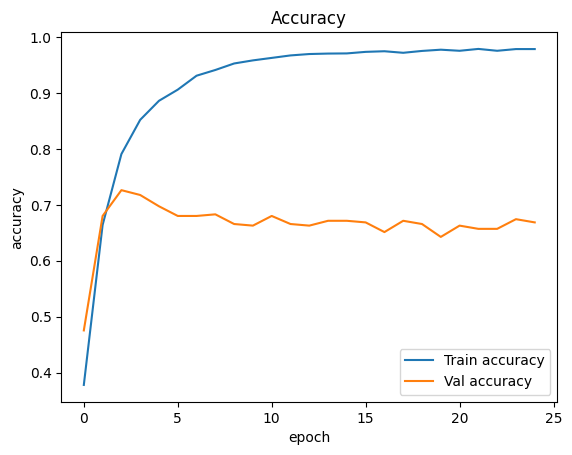

In [10]:
# Accuracy

import matplotlib.pyplot as plt
  
# line 1 points
x1 = training_log["epoch"]
y1 = training_log["accuracy"]
# plotting the line 1 points 
plt.plot(x1, y1, label = "Train accuracy")
  
# line 2 points
x2 = training_log["epoch"]
y2 = training_log["val_accuracy"]
# plotting the line 2 points 
plt.plot(x2, y2, label = "Val accuracy")
  
# naming the x axis
plt.xlabel('epoch')
# naming the y axis
plt.ylabel('accuracy')
# giving a title to my graph
plt.title('Accuracy')
  
# show a legend on the plot
plt.legend()
  
# function to show the plot
plt.show()

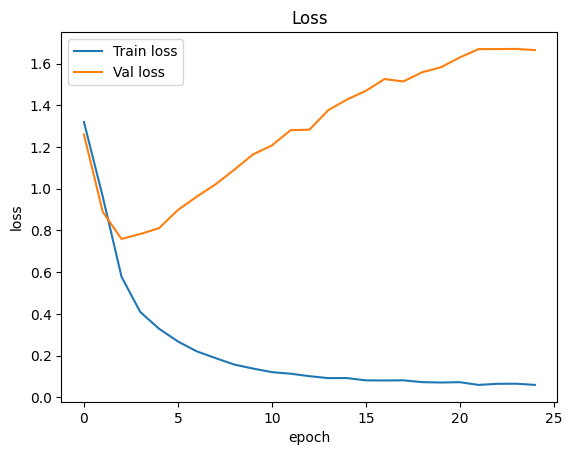

In [11]:
# Loss

import matplotlib.pyplot as plt
  
# line 1 points
x1 = training_log["epoch"]
y1 = training_log["loss"]
# plotting the line 1 points 
plt.plot(x1, y1, label = "Train loss")
  
# line 2 points
x2 = training_log["epoch"]
y2 = training_log["val_loss"]
# plotting the line 2 points 
plt.plot(x2, y2, label = "Val loss")
  
# naming the x axis
plt.xlabel('epoch')
# naming the y axis
plt.ylabel('loss')
# giving a title to my graph
plt.title('Loss')
  
# show a legend on the plot
plt.legend()
  
# function to show the plot
plt.show()

### Explanation of the relationship between accuracy and loss to the overfitting and underfitting:
By the both graphs above, these graphs indicate that the model is overfitting, which means that it cannot generalize on new data. This is because the model performs well on training data but poorly on the new data in the validation set. 

At the plot of training accuracy and validation accuracy, we can see that two lines are split around epoch three. Training accuracy continues to grow, while validation accuracy stays around 0.7. That means the accuracy of the training data is much higher than the validation data, which stands for overfitting.

At the plot of training loss and validation loss, we can see that two lines are no longer overlap around epoch 3. Training loss continues to go down, while validation loss continues to go up. That means the loss of the training data is much lower than the validation data, which implies that the model will fit more on training data and loss more on validation data, which also stands for overfitting.

## Exercise 7

### Explanation of how to use word vectors to represent the sentence data and train our model:
After having the model, we could feed each tokenized sentence into the model. The model will get the top-n most similar words from the tokenized sentence. We could see which label in each prediction has the highest probability and set that label as the final result of the sentence prediction.

In [12]:
## check library
import gensim

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()
training_corpus = train_df['text_tokenized'].values

from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

In [13]:
# Answer here
tag = train_df["emotion"].unique().tolist()
result = []
for sen in train_df["text_tokenized"]:
    prob = word2vec_model.wv.most_similar(sen, topn=8000)
    for w in prob:
        if (tag.count(w[0])>0):
            result.append(w[0])
            break
print(len(result))
print(len(train_df["emotion"]))

3613
3613


In [ ]:
result

## Exercise 8

load ok
happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Sa

/Users/milkshakebro/Desktop/四上/資料探勘/venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/milkshakebro/Desktop/四上/資料探勘/venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


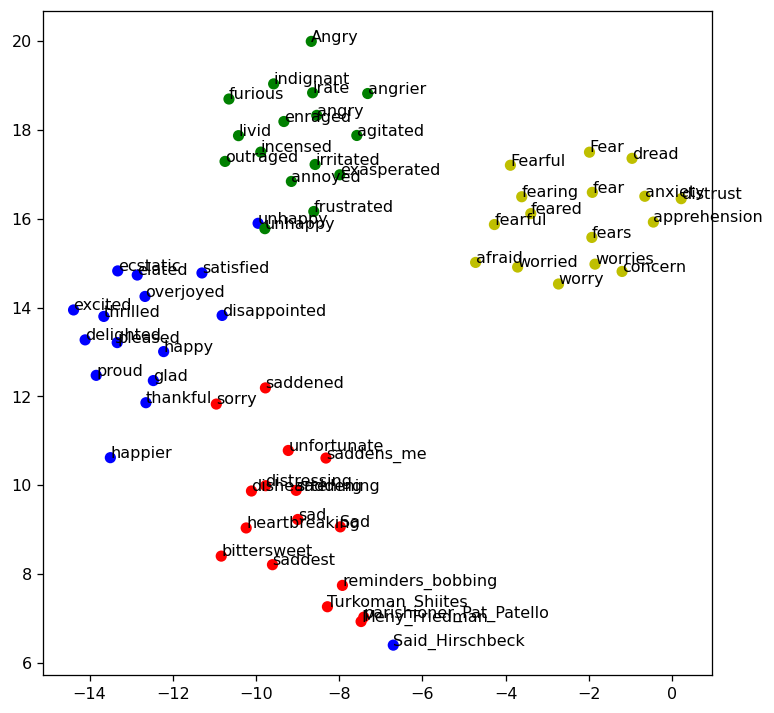

In [16]:
# Answer here
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

## w2v model
model = w2v_google_model

word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

# Part two

# Part three

Report: [https://docs.google.com/document/d/1vQwCis_mKMzaBwI16CQaYvN_UxSxawyhmkUNeFAyXGs/edit?usp=sharing]